 # 5. Fourier
 #### Fourier Series
 
 For a function in $0 \leq x < L$ that is even, we can write it as:
 $ f(x) = \sum_{k=0}^{\infty} a_k \cos \left( \dfrac{2 \pi k x}{L} \right)$<br>
 And if it is antisymmetric, we can write it as $ f(x) = \sum_{k=0}^{\infty} a_k \sin \left( \dfrac{2 \pi k x}{L} \right)$ <br>
 
 In general, a function can be written as $f(x) = \sum_{k=0}^{\infty} a_k \cos \left( \dfrac{2 \pi k x}{L} \right) + \sum_{k=1}^{\infty} b_k \sin \left( \dfrac{2 \pi k x}{L} \right)$ <br>
 Or, in complex notation, $f(x)  = \sum_{k = -\infty}^{\infty} c_k e^{i \dfrac{2 \pi k x}{L}}$ <br>
 Where $\gamma_k = \dfrac{1}{L} \int_0^L f(x) e^{-i \dfrac{2 \pi k x}{L}} dx$


### The discrete Fourier Transform

If $f(x)$ is too complicated or is not known anlitically, we need to calculate the Fourier coefficients numerically. We can use the Trapezoid ruel with $N$ slices of width $h = L / N$ each. We get:

$ \gamma_k = \dfrac{1}{L} \dfrac{L}{N} \left[ \dfrac{1}{2} f(0) + \dfrac{1}{2} f(L) + \sum_{n=1}^{N-1} f(x_n) e^{-i \frac{2 \pi k x_n}{L}} \right]$ <br>

Where the positions $x_n$ of the sample points for the integral are $x_n = \dfrac{n}{N} L$.  But since $f(x)$ is periodic, $f(0) = f(L)$, so the equation simplifies to <br>
$\gamma_k = \dfrac{1}{N} \sum_{n=0}^{N-1} f(x_n) e^{-i \frac{2 \pi k x_n}{L}}$ <br>

So we can calculate the fourier coefficients of $f(x)$ by only sampling the function at equally spaced intervals. <br>
This is known as the __Discrete Fourier Transform (DFT)__ of the samples $y_n = f(x_n)$ defined as: (note we ignore the factor $1/N$, the real Fourier coefficients would be $c_k / N$ <br>
$c_k = \sum_{n=0}^{N-1} y_n e^{-i \frac{2 \pi k n}{N}}$ <br> <br>

We also have a kind of __Inverse DFT__ to recuperate back the sampled values $y_n$ as:

$ y_n = \dfrac{1}{N} \sum_{k=0}^{N-1} c_k e^{i \frac{2 \pi k n}{N}}$ <br><br>

Entonces podemos movernos libremente entre los sample points y los coeficientes $c_k$ <br> <br>

Es importante notar que los valores $c_k$ solamente nos logran dar informacion sobre los sample points $y_n$, no nos dicen nada sobre puntos intermedios <br> <br>

__Theorem__: If $1 \leq r < \dfrac{1}{2} N$, then $c_{N-r} = c_r^*$ , so we only need to calculate half as many coefficients

In [1]:
# DFT given N real samples y_n
# los samples estan en x_n = (n/N)L
import numpy as np


def dft(y):
    N = len(y)
    c = np.zeros(N,complex)
    
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
        c[N-k-1]=np.conjugate(c[k])
    return(c)


dft([23,4,2,4,5,2,1])

array([41.        +0.j        , 17.11864546-1.91161071j,
       23.89492808-3.70661522j, 18.98642646+0.32672331j,
       23.89492808+3.70661522j, 17.11864546+1.91161071j,
       41.        -0.j        ])

###### Two dimensional Fourier Transforms
Suppose we have an M x N grid of samples $y_{mn}$, then <br>

We first have that $c_{kl} = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} y_{mn} e^{\left[ - i 2 \pi \left( \dfrac{km}{M} + \dfrac{ln}{N} \right) \right]}$ <br>

And we have the corresponding inverse transform:
$ y_{mn} = \dfrac{1}{MN} \sum_{k=0}^{M-1} \sum_{l=0}^{N-1} c_{kl} e^{i 2  \pi \left( \dfrac{km}{M} + \dfrac{ln}{N} \right)}$

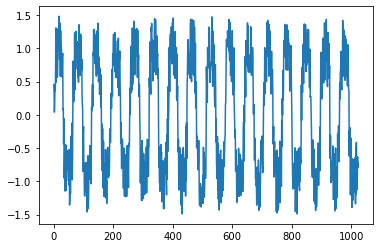

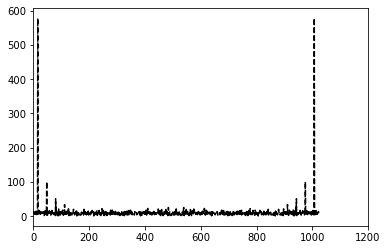

In [2]:
import numpy as np
from matplotlib import pylab as plt

# we have a signal and plot it
y = np.loadtxt("pitch.txt",float)
plt.plot(y)
plt.show()

# we calculate the DFT and graph the values
c=dft(y)
plt.plot(abs(c),'k--')
plt.xlim(0,1200)
plt.show()




Cosine Fast Transform
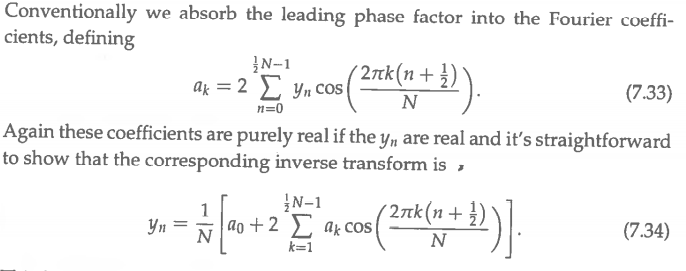


### Fast Fourier Transforms

Again, the DFT is defined as $c_k = \sum_{n=0}^{N-1} y_n e^{-i \dfrac{ 2 \pi k n}{N} }$<br>

The FFT  is simplest when the number of samples is a power of two, so we consider $N = 2^m$ and we divide the sum in the $c_k$ equation in two groups (one of evens E and one of odds O): <br>
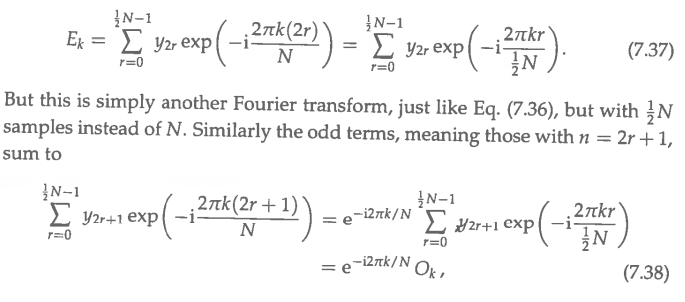

Where $O_k$ is another Fourier transform with $1/2 N$ samples. <br>

The comlete Fourier coefficient $c_k$ is 

$ c_k = E_k + e^{-i2 \pi k / N} O_k$

Where $E_k , O_k$ are each themselves DFT of the same function $f(x)$ with half as many points spaced twice as far apart, plus an extra factor $e^{-i 2 \pi k / N}$, calles a __twiddle factor__. <br>

Now, to do the two smaller FT, we just repear the process. We split each of them into their even and odd terms and express the DFT as a sum of the odd and even parts with a twiddle factor. Because $N$ is a power of two, we can repeat this ontil we get to the DFT of a single sample. But the FT of a single Fourier coefficient $c_0$, which, putting $k=0, N =1$ is equal to   $c_0 = \sum_{n=0}^0 y_n e^0 = y_0$ <br>

For the actual calculation, we start with the single point FT and then go up. <br>

We can also do a similar thing for the inverse FFT. <br> <br> 

#### Formulas for the FFT



0. Stage 0: We hava a single Fourier transform of the entire set of samples. 
1. Stage 1: We split the samples into two sets.
2. We split again into four sets and so on. 

In general, at the mth stage of the process there will be $2^m$ sets consisting of $N / 2^m$ samples each. <br>
The first of these sets consists of the original samples numbered $0, 2^m, 2^m x 2 , 2^m x $ and so forth. That is, it consists of sample numbers $2^m r$ with integer $r = 0, \cdost , N/2^m - 1$. Similarly, the second set consists of sample numbers $2^m r + 1$ and third of sample numbers $2^m r + 2$ and so on, with $ r =0 , \cdots, N/2^m-1$ in each case. <br> 

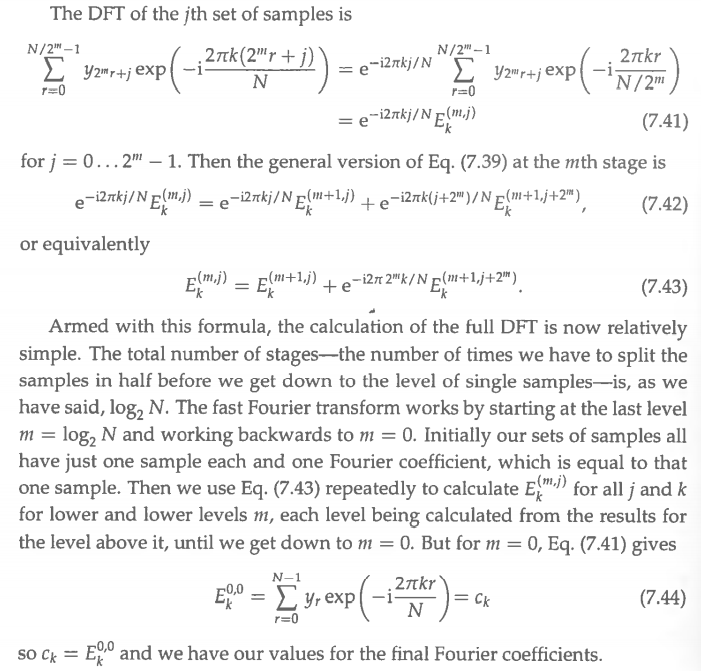


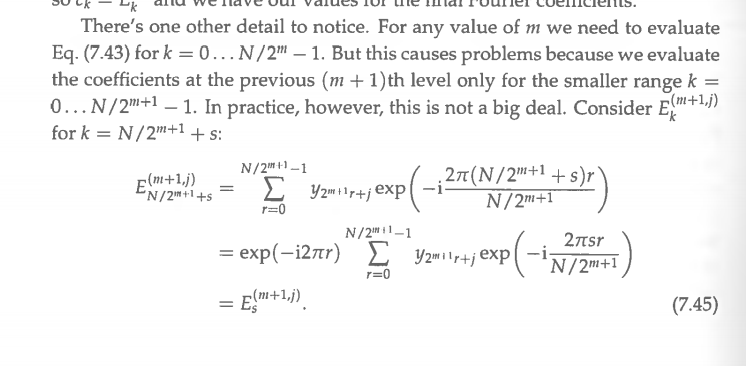

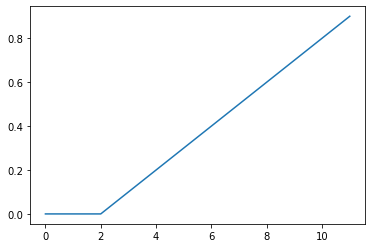

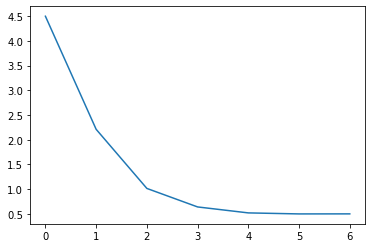

In [3]:
# Standard functions for FFT

import numpy as np
from matplotlib import pylab as plt


# say we have the sample
y = np.array([0,0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], float)

plt.plot(y)
plt.show()

#now we calculate the FFT


# it gives only the first 1/2 N + 1 coefficients
# because the others are redundant
c = np.fft.rfft(y)
plt.plot(abs(c))
plt.show()




In [4]:
# inverse FFT
# We only need N/2+1 coefficients to recover the original sample

z = np.fft.irfft(c)
print(z)

[-3.70074342e-17  7.40148683e-17  0.00000000e+00  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


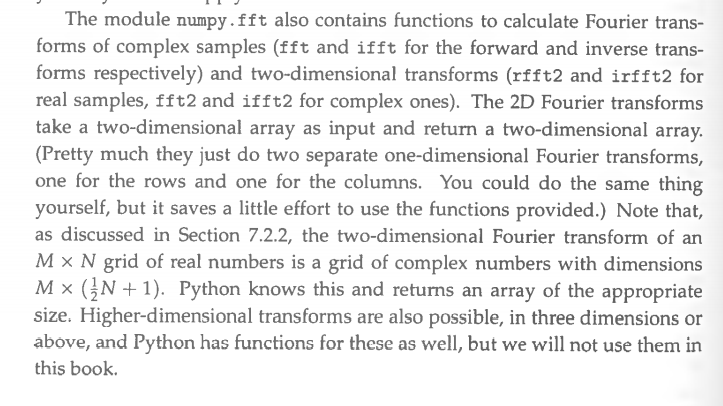